In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline

### Analysis of audio features

#### General look at the dataframe

In [81]:
features = pd.read_pickle("../../files/pickle/audioanalysis_compl.pkl")

In [82]:
features = features[pd.DatetimeIndex(features['release']).year > 2017].reset_index(drop=True)

In [83]:
features.shape

(1804, 30)

In [84]:
features['release_year'] = pd.DatetimeIndex(features['release']).year

In [85]:
features.columns

Index(['id', 'artist', 'title', 'year', 'month', 'week', 'totalweeksincharts',
       'total2018weeksincharts', 'total2019weeksincharts',
       'total2020weeksincharts', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'spotify-id',
       'track_href', 'analysis_url', 'uri', 'genres', 'release', 'genre',
       'release_year'],
      dtype='object')

In [86]:
features.isna().sum()

id                         0
artist                     0
title                      0
year                       0
month                      0
week                       0
totalweeksincharts         0
total2018weeksincharts     0
total2019weeksincharts     0
total2020weeksincharts     0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
duration_ms                0
time_signature             0
spotify-id                 0
track_href                 0
analysis_url               0
uri                        0
genres                     0
release                    0
genre                     33
release_year               0
dtype: int64

In [87]:
features[features.genre.isna()]

,id,artist,title,year,month,week,totalweeksincharts,total2018weeksincharts,total2019weeksincharts,total2020weeksincharts,...,duration_ms,time_signature,spotify-id,track_href,analysis_url,uri,genres,release,genre,release_year
22,36,Rico feat. Bausa,Junkie,2018,2,5,1,1,0,0,...,180629,5,65XkACIW102XrSX2jHii83,https://api.spotify.com/v1/tracks/65XkACIW102X...,https://api.spotify.com/v1/audio-analysis/65Xk...,spotify:track:65XkACIW102XrSX2jHii83,[],2018-01-26,NaN,2018
169,193,Michel Truog,Und sie rennt,2018,5,19,1,1,0,0,...,218874,4,6dAskczOF7mhbt1xweoi2E,https://api.spotify.com/v1/tracks/6dAskczOF7mh...,https://api.spotify.com/v1/audio-analysis/6dAs...,spotify:track:6dAskczOF7mhbt1xweoi2E,[],2018-05-05,NaN,2018
262,288,"KMN Gang feat. Azet, Miami Yacine, Nash & Zuna",KMN Member,2018,7,27,7,7,0,0,...,254763,4,3Cw0IAdjDgjyD4AEY4o2ZW,https://api.spotify.com/v1/tracks/3Cw0IAdjDgjy...,https://api.spotify.com/v1/audio-analysis/3Cw0...,spotify:track:3Cw0IAdjDgjyD4AEY4o2ZW,[],2018-06-29,NaN,2018
322,350,"Jugglerz feat. Miami Yacine, Bausa, Nura & Jos...",Fokus,2018,8,33,1,1,0,0,...,234740,4,49y9Jh6uPCc4DrhmL6yavX,https://api.spotify.com/v1/tracks/49y9Jh6uPCc4...,https://api.spotify.com/v1/audio-analysis/49y9...,spotify:track:49y9Jh6uPCc4DrhmL6yavX,[],2018-08-10,NaN,2018
524,557,Bayern 3 feat. Christina Stürmer & das Münchne...,(Ich wünsch dir) Sternstunden,2018,11,48,2,2,0,0,...,263984,4,75BRTDanDZxdINgi4ANIlc,https://api.spotify.com/v1/tracks/75BRTDanDZxd...,https://api.spotify.com/v1/audio-analysis/75BR...,spotify:track:75BRTDanDZxdINgi4ANIlc,[],2018-11-21,NaN,2018
550,628,The Kingdom Choir feat. Camélia Jordana & Namika,Holidays Are Coming,2018,12,52,3,1,1,1,...,188145,4,2fUcw8H81f2XJqRfqWYW93,https://api.spotify.com/v1/tracks/2fUcw8H81f2X...,https://api.spotify.com/v1/audio-analysis/2fUc...,spotify:track:2fUcw8H81f2XJqRfqWYW93,[],2018-11-09,NaN,2018
572,650,Gallo Nero,471,2019,1,3,1,0,1,0,...,206250,3,5MMToWZTIx01kfI6ff999q,https://api.spotify.com/v1/tracks/5MMToWZTIx01...,https://api.spotify.com/v1/audio-analysis/5MMT...,spotify:track:5MMToWZTIx01kfI6ff999q,[],2019-01-11,NaN,2019
766,845,Davin Herbrüggen,The River,2019,5,18,1,0,1,0,...,190571,4,4eCQtCHMN3k33xahmB9p9I,https://api.spotify.com/v1/tracks/4eCQtCHMN3k3...,https://api.spotify.com/v1/audio-analysis/4eCQ...,spotify:track:4eCQtCHMN3k33xahmB9p9I,[],2019-04-26,NaN,2019
797,876,SosMula x Bonez MC,1K Shotz,2019,5,20,2,0,2,0,...,124080,4,2WueTxY1xyhYzGfDEq2eDX,https://api.spotify.com/v1/tracks/2WueTxY1xyhY...,https://api.spotify.com/v1/audio-analysis/2Wue...,spotify:track:2WueTxY1xyhYzGfDEq2eDX,[],2019-03-10,NaN,2019
832,911,Gallo Nero & RAF Camora,Hermès,2019,5,22,2,0,2,0,...,172001,4,5FlVWM4jmo1Lstc4TLJSex,https://api.spotify.com/v1/tracks/5FlVWM4jmo1L...,https://api.spotify.com/v1/audio-analysis/5FlV...,spotify:track:5FlVWM4jmo1Lstc4TLJSex,[],2019-05-24,NaN,2019


In [88]:
general = features.drop(columns=['spotify-id', 'track_href', 'analysis_url','uri'], axis=1)

In [89]:
general.columns.tolist()

['id',
 'artist',
 'title',
 'year',
 'month',
 'week',
 'totalweeksincharts',
 'total2018weeksincharts',
 'total2019weeksincharts',
 'total2020weeksincharts',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'genres',
 'release',
 'genre',
 'release_year']

#### Load overview dataframe with information about song title, artist, etc. for merge

In [90]:
overview = pd.read_pickle("../../files/pickle/overview.pkl")

In [91]:
overview.columns.tolist()

['id',
 'artist',
 'title',
 'year',
 'month',
 'week',
 'totalweeksincharts',
 'total2018weeksincharts',
 'total2019weeksincharts',
 'total2020weeksincharts',
 'lang',
 'genres',
 'genre',
 'release']

In [92]:
df = pd.merge(general, overview[['id', 'lang']], how='left', on=['id'],
                         sort=False)

In [93]:
general.columns.tolist()

['id',
 'artist',
 'title',
 'year',
 'month',
 'week',
 'totalweeksincharts',
 'total2018weeksincharts',
 'total2019weeksincharts',
 'total2020weeksincharts',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'genres',
 'release',
 'genre',
 'release_year']

In [94]:
df.head()

,id,artist,title,year,month,week,totalweeksincharts,total2018weeksincharts,total2019weeksincharts,total2020weeksincharts,...,liveness,valence,tempo,duration_ms,time_signature,genres,release,genre,release_year,lang
0,1,Kollegah & Farid Bang,One Night Stand,2018,1,1,4,4,0,0,...,0.1670,0.309,108.883,163773,4,[german hip hop],2018-06-29,german hip hop,2018,de
1,3,Jazn,Bombay,2018,1,1,9,9,0,0,...,0.0994,0.422,96.032,193040,4,"[german hip hop, german trap]",2018-11-23,german hip hop,2018,de
2,6,Liam Payne & Rita Ora,For You (Fifty Shades Freed),2018,1,2,20,20,0,0,...,0.1570,0.200,113.000,245453,4,"[dance pop, pop, post-teen pop]",2018-02-09,dance pop,2018,en
3,8,Justin Timberlake,Filthy,2018,1,2,3,3,0,0,...,0.2460,0.645,97.002,293947,4,"[dance pop, pop]",2018-02-02,dance pop,2018,en
4,9,Fard,Die Besten sterben jung,2018,1,2,1,1,0,0,...,0.1250,0.587,171.378,205000,4,"[deep german hip hop, german hip hop]",2018-01-05,deep german hip hop,2018,de


In [99]:
sameyear = []
for i,j in zip(df['year'], df['release_year']):
    if i == j:
        sameyear.append(1)
    else:
        sameyear.append(0)
        
df['sameyear'] = sameyear

In [100]:
df['sameyear'].value_counts()

1    1710
0      94
Name: sameyear, dtype: int64

In [106]:
df[(df['sameyear'] < 1) & (df['year'] < df['release_year'])].shape

(46, 29)

#### Analyze audio features before Corona and after

*I use all songs before 2020 as pre-corona data and all songs of 2020 as post-corona.*

In [16]:
pre_corona = df[(df['year'] < 2020)]
pre_corona = pre_corona[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [17]:
post_corona = df[(df['year'] > 2019)]
post_corona = post_corona[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

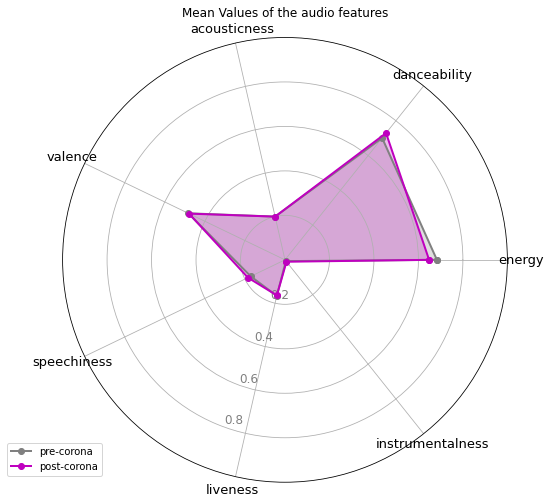

In [18]:
#Create a plot for mean values of audio features pre and post corona
labels= ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats= pre_corona.mean().tolist()
stats2 = post_corona.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels, fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm' )
ax.fill(angles, stats2, alpha=0.25, facecolor='m')
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_year_comparison.png', transparent=False, bbox_inches='tight')


#### Analyze audio features before Corona and after for the month of January

In [19]:
pre_corona_january = df[(df['year'] < 2020) & (df['month'] == 1)]
pre_corona_january = pre_corona_january[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [20]:
post_corona_january = df[(df['year'] > 2019) & (df['month'] == 1)]
post_corona_january = post_corona_january[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

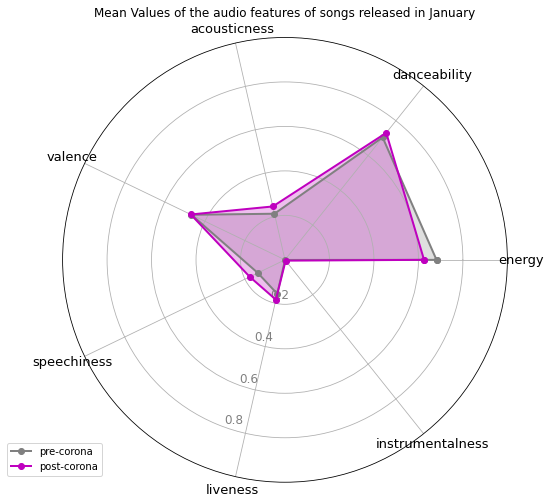

In [21]:
#Create a plot for mean values of audio features pre and post corona January released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_january.mean().tolist()
stats2 = post_corona_january.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in January')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_january_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of February

In [22]:
pre_corona_february = df[(df['year'] < 2020) & (df['month'] == 2)]
pre_corona_february = pre_corona_february[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [23]:
post_corona_february = df[(df['year'] > 2019) & (df['month'] == 2)]
post_corona_february = post_corona_february[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

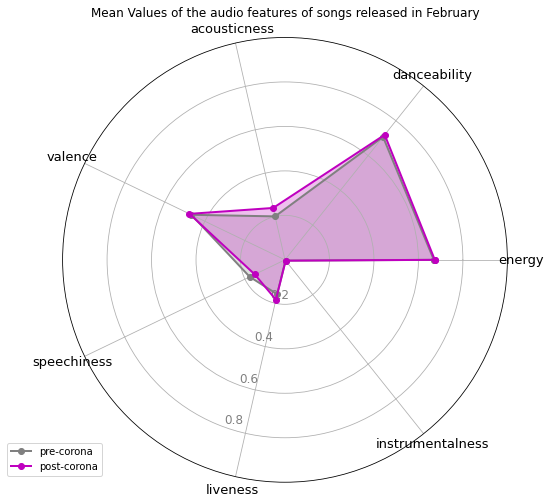

In [24]:
#Create a plot for mean values of audio features pre and post corona February released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_february.mean().tolist()
stats2 = post_corona_february.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in February')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_february_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of March

In [25]:
pre_corona_march = df[(df['year'] < 2020) & (df['month'] == 3)]
pre_corona_march = pre_corona_march[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [26]:
post_corona_march = df[(df['year'] > 2019) & (df['month'] == 3)]
post_corona_march = post_corona_march[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

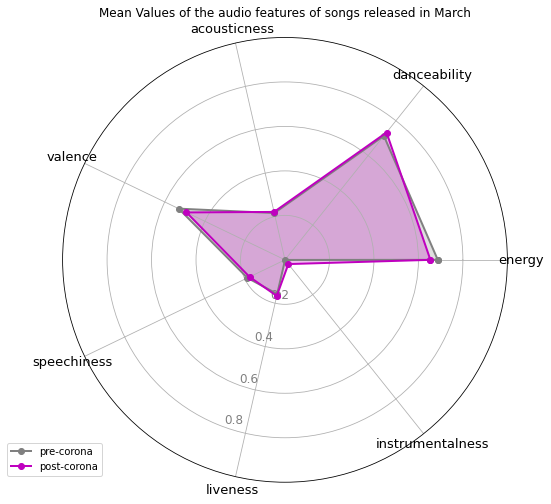

In [27]:
#Create a plot for mean values of audio features pre and post corona March released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_march.mean().tolist()
stats2 = post_corona_march.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in March')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_march_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of April

In [28]:
pre_corona_april = df[(df['year'] < 2020) & (df['month'] == 4)]
pre_corona_april = pre_corona_april[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [29]:
post_corona_april = df[(df['year'] > 2019) & (df['month'] == 4)]
post_corona_april = post_corona_april[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

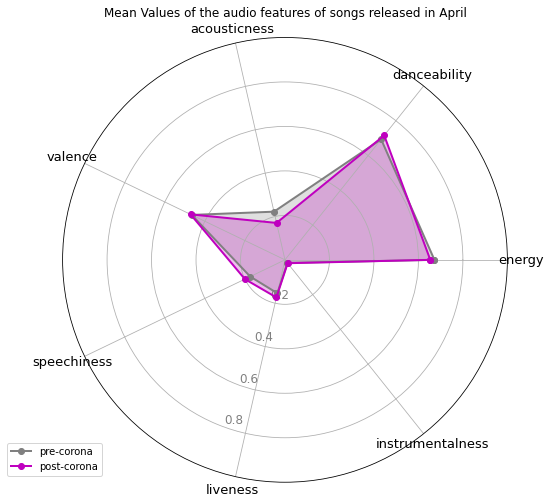

In [30]:
#Create a plot for mean values of audio features pre and post corona April released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_april.mean().tolist()
stats2 = post_corona_april.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in April')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_april_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of May

In [31]:
pre_corona_may = df[(df['year'] < 2020) & (df['month'] == 5)]
pre_corona_may = pre_corona_may[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [32]:
post_corona_may = df[(df['year'] > 2019) & (df['month'] == 5)]
post_corona_may = post_corona_may[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

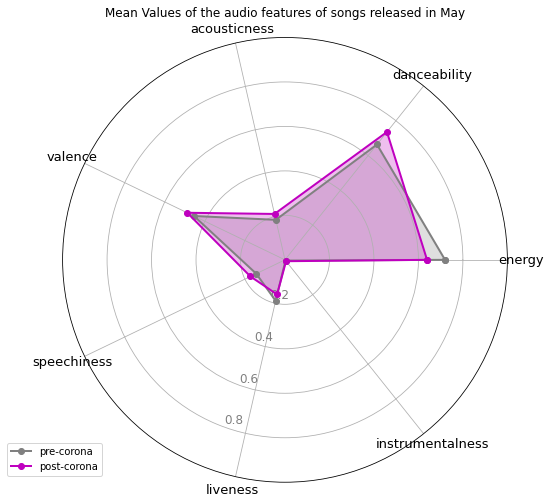

In [33]:
#Create a plot for mean values of audio features pre and post corona May released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_may.mean().tolist()
stats2 = post_corona_may.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in May')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_may_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of June

In [34]:
pre_corona_june = df[(df['year'] < 2020) & (df['month'] == 6)]
pre_corona_june = pre_corona_june[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [35]:
post_corona_june = df[(df['year'] > 2019) & (df['month'] == 6)]
post_corona_june = post_corona_june[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

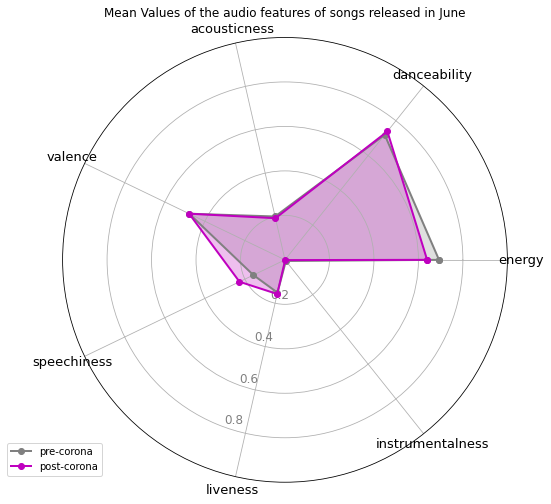

In [36]:
#Create a plot for mean values of audio features pre and post corona June released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_june.mean().tolist()
stats2 = post_corona_june.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in June')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_june_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of July

In [37]:
pre_corona_july = df[(df['year'] < 2020) & (df['month'] == 7)]
pre_corona_july = pre_corona_july[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [38]:
post_corona_july = df[(df['year'] > 2019) & (df['month'] == 7)]
post_corona_july = post_corona_july[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

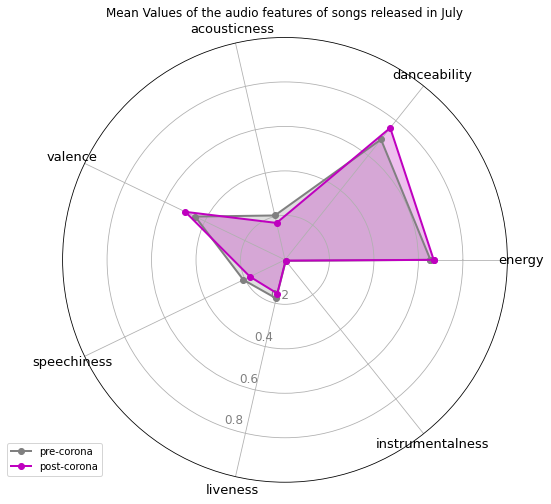

In [39]:
#Create a plot for mean values of audio features pre and post corona July released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_july.mean().tolist()
stats2 = post_corona_july.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in July')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_july_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of August

In [40]:
pre_corona_august = df[(df['year'] < 2020) & (df['month'] == 8)]
pre_corona_august = pre_corona_august[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [41]:
post_corona_august = df[(df['year'] > 2019) & (df['month'] == 8)]
post_corona_august = post_corona_august[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

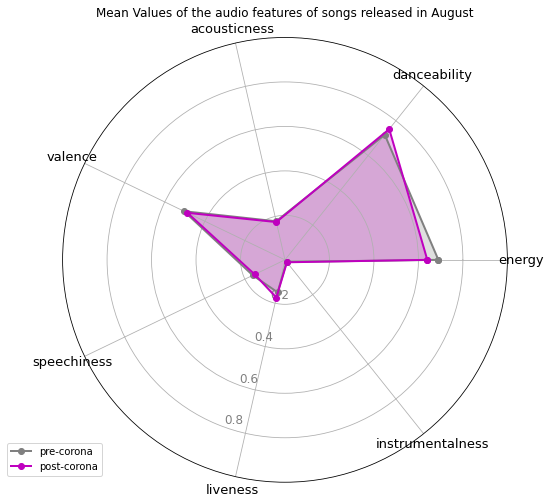

In [42]:
#Create a plot for mean values of audio features pre and post corona August released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_august.mean().tolist()
stats2 = post_corona_august.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in August')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_august_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of September

In [43]:
pre_corona_september = df[(df['year'] < 2020) & (df['month'] == 9)]
pre_corona_september = pre_corona_september[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [44]:
post_corona_september = df[(df['year'] > 2019) & (df['month'] == 9)]
post_corona_september = post_corona_september[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

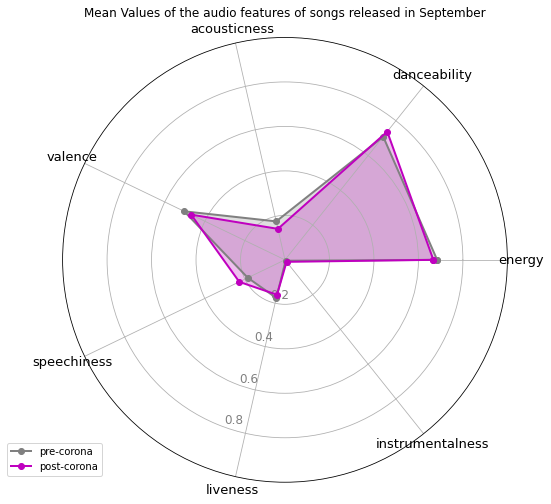

In [45]:
#Create a plot for mean values of audio features pre and post corona September released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_september.mean().tolist()
stats2 = post_corona_september.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in September')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_september_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of October

In [46]:
pre_corona_october = df[(df['year'] < 2020) & (df['month'] == 10)]
pre_corona_october = pre_corona_october[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [47]:
post_corona_october = df[(df['year'] > 2019) & (df['month'] == 10)]
post_corona_october = post_corona_october[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

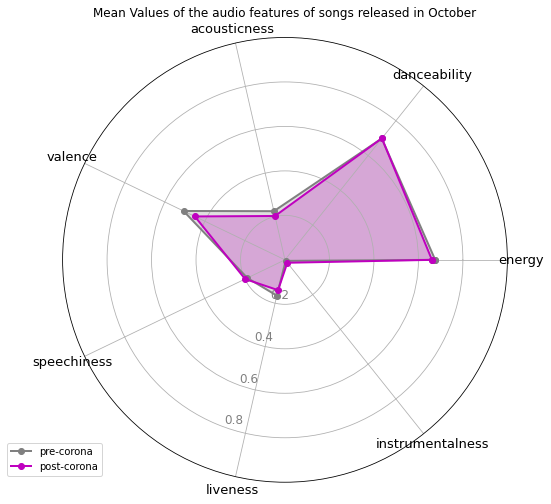

In [48]:
#Create a plot for mean values of audio features pre and post corona October released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_october.mean().tolist()
stats2 = post_corona_october.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in October')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_october_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of November

In [49]:
pre_corona_november = df[(df['year'] < 2020) & (df['month'] == 11)]
pre_corona_november = pre_corona_november[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [50]:
post_corona_november = df[(df['year'] > 2019) & (df['month'] == 11)]
post_corona_november = post_corona_november[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

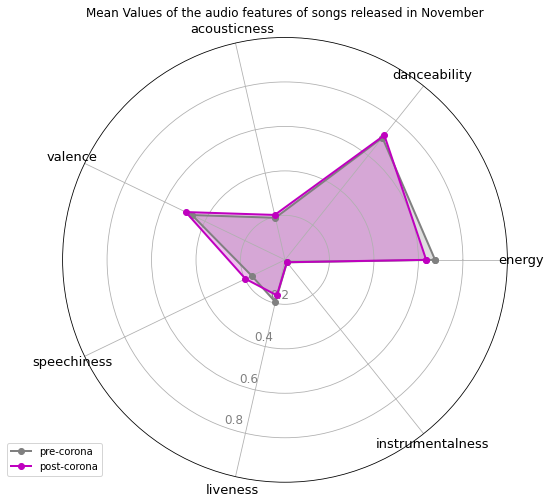

In [51]:
#Create a plot for mean values of audio features pre and post corona November released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_november.mean().tolist()
stats2 = post_corona_november.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in November')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_november_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the month of December

In [52]:
pre_corona_december = df[(df['year'] < 2020) & (df['month'] == 12)]
pre_corona_december = pre_corona_december[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [53]:
post_corona_december = df[(df['year'] > 2019) & (df['month'] == 12)]
post_corona_december = post_corona_december[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

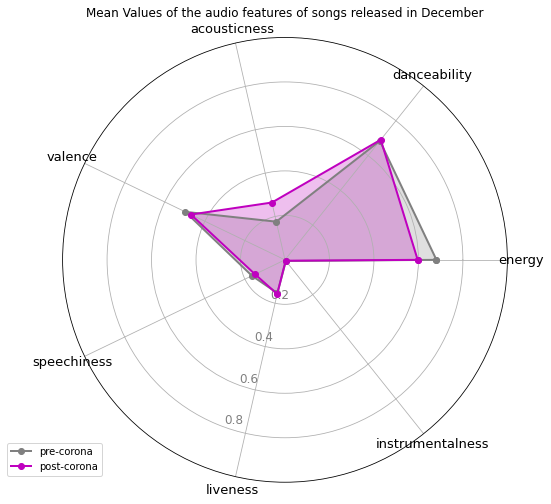

In [54]:
#Create a plot for mean values of audio features pre and post corona December released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_december.mean().tolist()
stats2 = post_corona_december.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels, fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in December')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_december_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the months of the first lockdown
* Months of March until May

In [55]:
pre_corona_first_lockdown = df[(df['year'] < 2020) & (df['month'] > 2) & (df['month'] < 6)]
pre_corona_first_lockdown = pre_corona_first_lockdown[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [56]:
post_corona_first_lockdown = df[(df['year'] > 2019) & (df['month'] > 2) & (df['month'] < 6)]
post_corona_first_lockdown = post_corona_first_lockdown[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

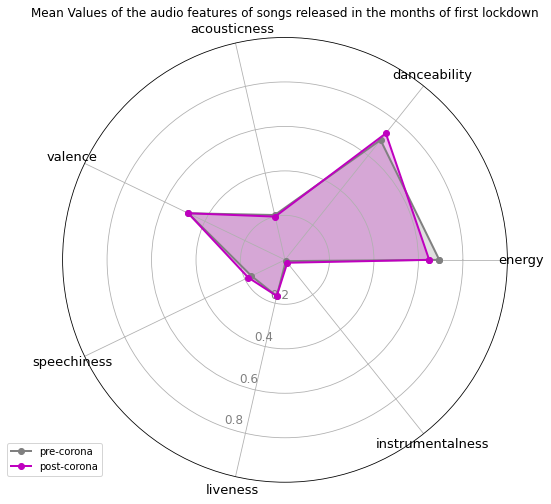

In [57]:
#Create a plot for mean values of audio features pre and post corona first lockdown released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_first_lockdown.mean().tolist()
stats2 = post_corona_first_lockdown.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in the months of first lockdown')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_lockdown1_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for the months of the second lockdown
* Months of November and December

In [58]:
pre_corona_second_lockdown = df[(df['year'] < 2020) & (df['month'] > 10)]
pre_corona_second_lockdown = pre_corona_second_lockdown[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [59]:
post_corona_second_lockdown = df[(df['year'] >2019) & (df['month'] > 10)]
post_corona_second_lockdown = post_corona_second_lockdown[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

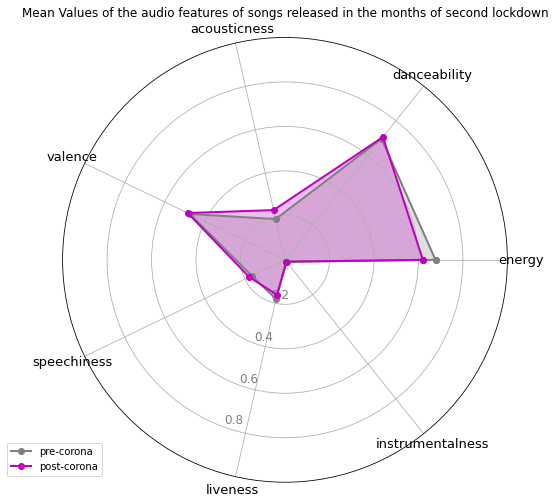

In [60]:
#Create a plot for mean values of audio features pre and post corona second lockdown released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_second_lockdown.mean().tolist()
stats2 = post_corona_second_lockdown.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in the months of second lockdown')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_lockdown2_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for meteorological spring
* Months of March until May

In [61]:
pre_corona_spring = df[(df['year'] < 2020) & (df['month'] > 2) & (df['month'] < 6)]
pre_corona_spring = pre_corona_spring[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [62]:
post_corona_spring = df[(df['year'] > 2019) & (df['month'] > 2) & (df['month'] < 6)]
post_corona_spring = post_corona_spring[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

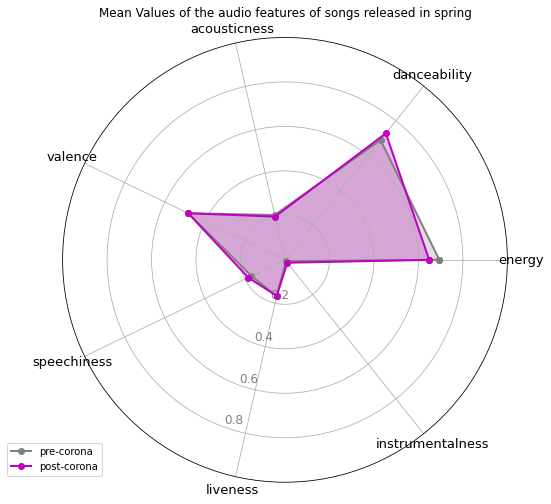

In [63]:
#Create a plot for mean values of audio features pre and post corona meteorological spring released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_spring.mean().tolist()
stats2 = post_corona_spring.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in spring')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_spring_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for meteorological summer
* Months of June until August

In [64]:
pre_corona_summer = df[(df['year'] < 2020) & (df['month'] > 5) & (df['month'] < 9)]
pre_corona_summer = pre_corona_summer[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [65]:
post_corona_summer = df[(df['year'] > 2019) & (df['month'] > 5) & (df['month'] < 9)]
post_corona_summer = post_corona_summer[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

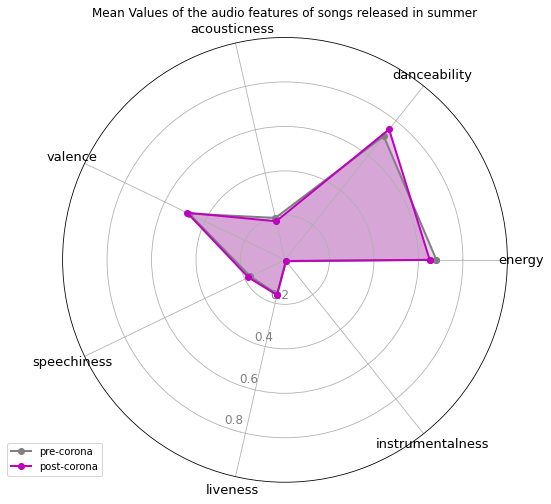

In [66]:
#Create a plot for mean values of audio features pre and post corona meteorological summer released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_summer.mean().tolist()
stats2 = post_corona_summer.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in summer')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_summer_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for meteorological autumn
* Months of September until November

In [67]:
pre_corona_autumn = df[(df['year'] < 2020) & (df['month'] > 8) & (df['month'] < 12)]
pre_corona_autumn = pre_corona_autumn[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [68]:
post_corona_autumn = df[(df['year'] > 2019) & (df['month'] > 8) & (df['month'] < 12)]
post_corona_autumn = post_corona_autumn[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

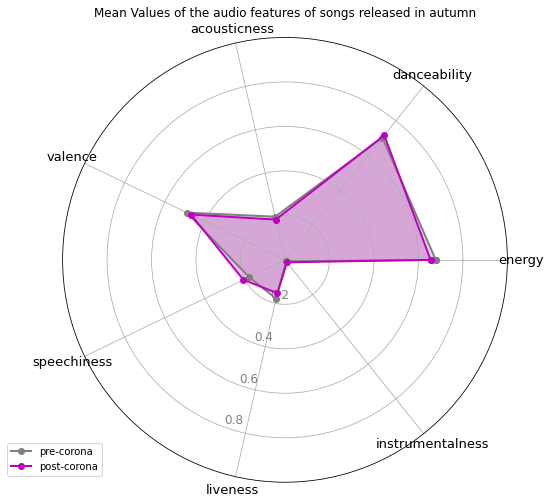

In [69]:
#Create a plot for mean values of audio features pre and post corona meteorological autumn released songs
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_autumn.mean().tolist()
stats2 = post_corona_autumn.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released in autumn')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_autumn_comparison.png', transparent=False, bbox_inches='tight')

#### Analyze audio features before Corona and after for all months with corona
* Months of March until December

In [70]:
pre_corona_specialtotal = df[(df['year'] < 2020) & (df['month'] > 2)]
pre_corona_specialtotal = pre_corona_specialtotal[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

In [71]:
post_corona_specialtotal = df[(df['year'] > 2019) & (df['month'] > 2)]
post_corona_specialtotal = post_corona_specialtotal[['energy', 
                         'danceability',
                         'acousticness',
                         'valence',
                         'speechiness',
                         'liveness',
                         'instrumentalness',
                        ]]

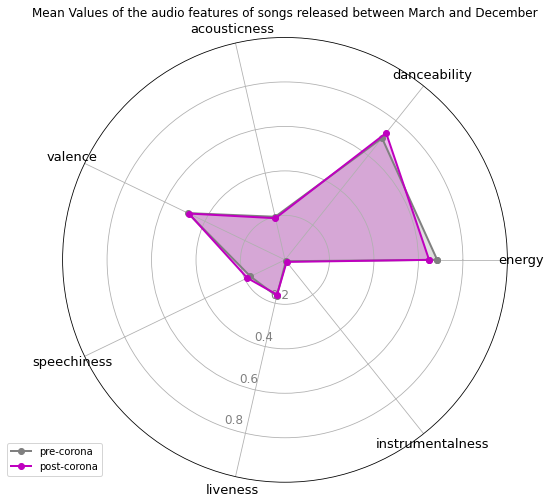

In [72]:
#Create a plot for mean values of audio features pre and post corona for all months of corona
labels = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'liveness', 'instrumentalness',]
stats = pre_corona_specialtotal.mean().tolist()
stats2 = post_corona_specialtotal.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "pre-corona", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "post-corona", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features of songs released between March and December')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.savefig('../../graphics/audio_specialtotal_comparison.png', transparent=False, bbox_inches='tight')